# Exploring the senegalese tax-benefit-system with OpenFisca

In [1]:
import matplotlib.pyplot as plt  # For graphics
%matplotlib inline
from openfisca_core import periods

from openfisca_senegal import CountryTaxBenefitSystem as SenegalTaxBenefitSystem  # The Senegalese tax-benefits system
from openfisca_senegal.scenarios import init_single_entity

## The concepts

### Tax Benefit System

In [2]:
tax_benefit_system = SenegalTaxBenefitSystem()
tax_benefit_system

### Entities

In [3]:
tax_benefit_system.entities

In [4]:
[entity.key for entity in tax_benefit_system.entities]

['household', 'person']

In [5]:
[entity.label for entity in tax_benefit_system.entities]

['Household', 'Person']

### Variables 

In [6]:
tax_benefit_system.variables

{'household_weight': <140375971434160_-4354617655474570901_weights.household_weight at 0x7fac146eb520>,
 'person_weight': <140375971434160_-4354617655474570901_weights.person_weight at 0x7fac146eb190>,
 'benefices_non_salarie': <140375971434160_-2889367776004653549_revenus.benefices_non_salarie at 0x7fac146eb670>,
 'conjoint_a_des_revenus': <140375971434160_-2889367776004653549_revenus.conjoint_a_des_revenus at 0x7fac146e0bb0>,
 'pension_retraite': <140375971434160_-2889367776004653549_revenus.pension_retraite at 0x7fac146e0c40>,
 'salaire': <140375971434160_-2889367776004653549_revenus.salaire at 0x7fac146d3820>,
 'age': <140375971434160_5821211806142594562_caracteristiques_socio_demographiques.age at 0x7fac15f24910>,
 'date_naissance': <140375971434160_5821211806142594562_caracteristiques_socio_demographiques.date_naissance at 0x7fac146e63a0>,
 'est_celibataire': <140375971434160_5821211806142594562_caracteristiques_socio_demographiques.est_celibataire at 0x7fac146e6340>,
 'est_divor

In [7]:
sorted(tax_benefit_system.variables.keys())

['age',
 'benefices_non_salarie',
 'conjoint_a_des_revenus',
 'date_naissance',
 'est_celibataire',
 'est_divorce',
 'est_marie',
 'est_veuf',
 'household_weight',
 'impot_avant_reduction_famille',
 'impot_revenus',
 'impots_indirects',
 'nombre_de_parts',
 'nombre_enfants',
 'pension_retraite',
 'person_weight',
 'reduction_impots_pour_charge_famille',
 'salaire',
 'statut_marital']

In [8]:
import inspect
for name, variable in sorted(tax_benefit_system.variables.items()):
    print(name)
    if not variable.is_input_variable():
        formula = variable.get_formula('2017')
        source_code = inspect.getsourcelines(formula)[0]
        print(''.join(source_code))
    print('')

age
    def formula(individu, period, parameters):
        date_naissance = individu('date_naissance', period)
        birth_year = date_naissance.astype('datetime64[Y]').astype(int) + 1970
        birth_month = date_naissance.astype('datetime64[M]').astype(int) % 12 + 1
        birth_day = (date_naissance - date_naissance.astype('datetime64[M]') + 1).astype(int)

        is_birthday_past = (
            (birth_month < period.start.month) + (birth_month == period.start.month) * (birth_day <= period.start.day)
            )
        # If the birthday is not passed this year, subtract one year
        return (period.start.year - birth_year) - where(is_birthday_past, 0, 1)


benefices_non_salarie

conjoint_a_des_revenus

date_naissance

est_celibataire
    def formula(individu, period):
        return individu('statut_marital', period) == TypesStatutMarital.celibataire


est_divorce
    def formula(individu, period):
        return individu('statut_marital', period) == TypesStatutMarital.v

### Parameters

In [9]:
print(tax_benefit_system.parameters)

nombre_de_parts:
  limite_max:
    2013-01-01: 5
  par_enfant:
    2013-01-01: 0.5
  repartition_marie_conjoint:
    2013-01-01: 0.5
  veuf_avec_enfant:
    2013-01-01: 0.5
prelevements_obligatoires:
  impots_directs:
    bareme_impot_progressif:
      brackets:
        - rate:
            2013-01-01: 0.0
          threshold:
            2013-01-01: 0.0
        - rate:
            2013-01-01: 0.2
          threshold:
            2013-01-01: 630000.0
        - rate:
            2013-01-01: 0.3
          threshold:
            2013-01-01: 1500000.0
        - rate:
            2013-01-01: 0.35
          threshold:
            2013-01-01: 4000000.0
        - rate:
            2013-01-01: 0.37
          threshold:
            2013-01-01: 8000000.0
        - rate:
            2013-01-01: 0.4
          threshold:
            2013-01-01: 13500000.0
    reductions_pour_charge_de_famille:
      max_1:
        2013-01-01: 0.0
      max_2:
        2013-01-01: 300000.0
      max_3:
        2013-01-

In [10]:
parameters = tax_benefit_system.parameters(2017)

In [11]:
parameters.prelevements_obligatoires.impots_directs.bareme_impot_progressif

  - threshold: 0.0
    rate: 0.0
  - threshold: 630000.0
    rate: 0.2
  - threshold: 1500000.0
    rate: 0.3
  - threshold: 4000000.0
    rate: 0.35
  - threshold: 8000000.0
    rate: 0.37
  - threshold: 13500000.0
    rate: 0.4

## A simple test case scenario

### Basics

In [12]:
scenario = tax_benefit_system.new_scenario()

In [13]:
init_single_entity(
    scenario,
    parent1 = {
        'salaire': 2800000,
        'est_marie': True,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 1,
        },
    period = '2017',
    )

<openfisca_core.taxbenefitsystems.tax_benefit_system.TaxBenefitSystem.new_scenario.<locals>.ScenarioAdapter at 0x7fabcf33d1f0>

In [14]:
simulation = scenario.new_simulation()

In [15]:
simulation.calculate('salaire', period = '2017')

array([2800000.], dtype=float32)

In [16]:
simulation.calculate('impot_revenus', period = '2017')

array([11700.], dtype=float32)

### Application: a simple function to compute the tax gain for having a child

In [17]:
def tax_gain(salaire = 0, est_marie = False, conjoint_a_des_revenus = False, nombre_enfants = 0):
    period = '2017'
    parent1_before = {
        'salaire': salaire,
        'est_marie': est_marie,
        'conjoint_a_des_revenus': conjoint_a_des_revenus,
        'nombre_enfants': nombre_enfants,
        }
    simulation_before = init_single_entity(
        tax_benefit_system.new_scenario(),
        parent1 = parent1_before,
        period = period,
        ).new_simulation()
    parent1_after = parent1_before.copy()
    parent1_after['nombre_enfants'] += 1
    simulation_after = init_single_entity(
        tax_benefit_system.new_scenario(),
        parent1 = parent1_after,
        period = period,
        ).new_simulation()
    difference = simulation_after.calculate('impot_revenus', period) - simulation_before.calculate('impot_revenus', period)
    return -difference


In [18]:
tax_gain(salaire = 2800000)

array([100000.], dtype=float32)

In [19]:
tax_gain(salaire = 2800000, nombre_enfants = 2)

array([100000.], dtype=float32)

In [20]:
[tax_gain(salaire = 2800000, nombre_enfants = n) for n in range(8)]

[array([100000.], dtype=float32),
 array([100000.], dtype=float32),
 array([100000.], dtype=float32),
 array([11700.], dtype=float32),
 array([-0.], dtype=float32),
 array([-0.], dtype=float32),
 array([-0.], dtype=float32),
 array([-0.], dtype=float32)]

In [ ]:
for n in range(8):
    print("having ", n, " children gives a tax gain of ", tax_gain(salaire = 2800000, nombre_enfants = n) )

## More complex scenario: varying revenue 

### Basics

In [21]:
year = 2017
simulation = init_single_entity(
    tax_benefit_system.new_scenario(),
    parent1 = {
        'est_marie': True,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 0,
        },
    period = year,
    axes = [[
        {
            'count': 100,
            'min': 0,
            'max': 15e6,
            'name': 'salaire',
            }
        ]],
    ).new_simulation()


salaire = simulation.calculate('salaire', period = year)
reduction_impots_pour_charge_famille = simulation.calculate('reduction_impots_pour_charge_famille', period = year)
impot_avant_reduction_famille = simulation.calculate('impot_avant_reduction_famille', period = year)
impot_revenus = simulation.calculate('impot_revenus', period = year)

Text(0.5, 1.0, '0 enfants')

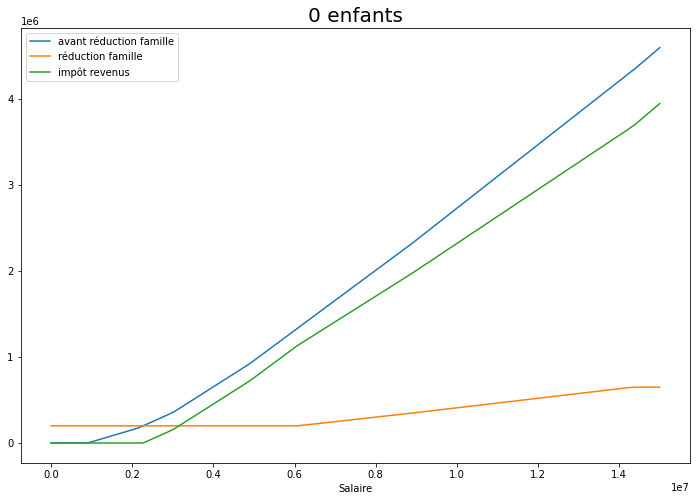

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(salaire, impot_avant_reduction_famille, label='avant réduction famille')
plt.plot(salaire, reduction_impots_pour_charge_famille, label='réduction famille')
plt.plot(salaire, impot_revenus, label='impôt revenus')
plt.xlabel('Salaire')
plt.legend()
plt.title('0 enfants', fontsize=20)

### Application: by how much the tax gain for having a child varies with revenue

In [23]:
def tax_gain_varying_revenue(max_salaire = 0, est_marie = False, conjoint_a_des_revenus = False,
                             nombre_enfants = 0, count = 100):
    period = '2017'
    parent1_before = {
        'est_marie': est_marie,
        'conjoint_a_des_revenus': conjoint_a_des_revenus,
        'nombre_enfants': nombre_enfants,
        }
    axes = [[
            {
                'count': count,
                'min': 0,
                'max': max_salaire,
                'name': 'salaire',
                }
            ]]
    simulation_before = init_single_entity(
        tax_benefit_system.new_scenario(),
        parent1 = parent1_before,
        axes = axes,
        period = period,
        ).new_simulation()
    parent1_after = parent1_before.copy()
    parent1_after['nombre_enfants'] += 1
    simulation_after = init_single_entity(
        tax_benefit_system.new_scenario(),
        parent1 = parent1_after,
        axes = axes,
        period = period,
        ).new_simulation()
    difference = simulation_after.calculate('impot_revenus', period) - simulation_before.calculate('impot_revenus', period)
    salaire = simulation_after.calculate('salaire', period)
    return salaire, -difference


In [24]:
salaire, gain = tax_gain_varying_revenue(max_salaire = 15e6, count = 1000)
gain

array([    -0.,     -0.,     -0.,     -0.,     -0.,     -0.,     -0.,
           -0.,     -0.,     -0.,     -0.,     -0.,     -0.,     -0.,
           -0.,     -0.,     -0.,     -0.,     -0.,     -0.,     -0.,
           -0.,     -0.,     -0.,     -0.,     -0.,     -0.,     -0.,
           -0.,     -0.,     -0.,     -0.,     -0.,     -0.,     -0.,
           -0.,     -0.,     -0.,     -0.,     -0.,     -0.,     -0.,
           -0.,     -0.,     -0.,     -0.,     -0.,     -0.,     -0.,
           -0.,     -0.,     -0.,     -0.,     -0.,     -0.,     -0.,
           -0.,     -0.,     -0.,     -0.,     -0.,   2200.,   4200.,
         6400.,   8400.,  10600.,  12600.,  14800.,  16800.,  19000.,
        21000.,  23200.,  25200.,  27400.,  29400.,  31600.,  33600.,
        35800.,  37800.,  40000.,  42000.,  44200.,  46200.,  48400.,
        50400.,  52600.,  54600.,  56800.,  58800.,  61000.,  63000.,
        65200.,  67200.,  69400.,  71400.,  73600.,  75800.,  77800.,
        80000.,  820

Text(0.5, 1.0, 'Gain fiscal au 1er enfant')

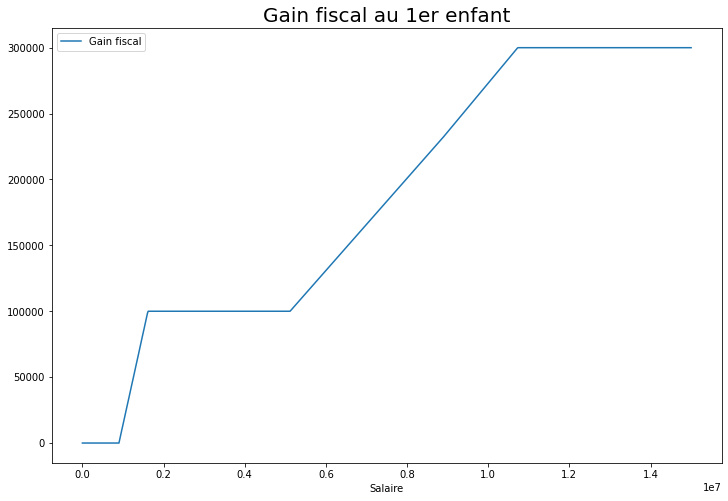

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(salaire, gain, label='Gain fiscal')
plt.xlabel('Salaire')
plt.legend()
plt.title('Gain fiscal au 1er enfant', fontsize=20)

#### Exercice: Write a loop to plot the gain for several children

Text(0.5, 1.0, "Gain fiscal selon le rang de l'enfant")

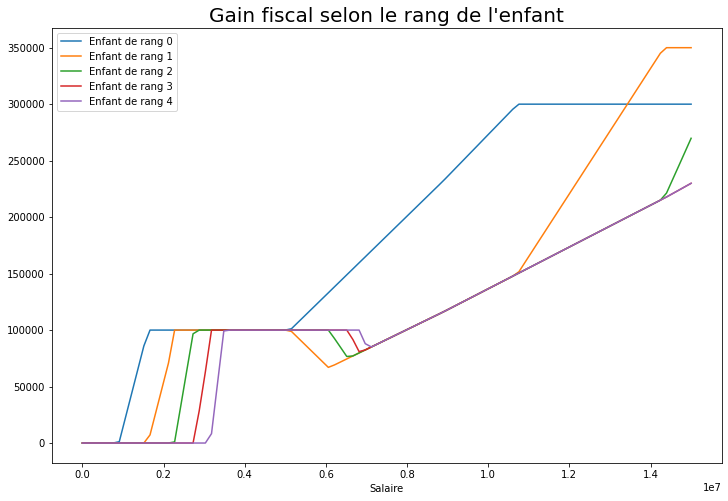

In [48]:
plt.figure(figsize=(12, 8))
for nombre_enfants in range(5):
    salaire, gain = tax_gain_varying_revenue(max_salaire=15e6, nombre_enfants = nombre_enfants)
    plt.plot(salaire, gain, label=f"Enfant de rang {nombre_enfants}")

plt.xlabel('Salaire')
plt.legend()
plt.title(u"Gain fiscal selon le rang de l'enfant", fontsize=20)
